<a href="https://colab.research.google.com/github/vidjaydas/Data_Science_Python/blob/main/Normal_Distribution_Share_beml_glaxo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
beml_df = pd.read_csv('/content/BEML.csv')
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [ ]:
glaxo_df = pd.read_csv('/content/GLAXO.csv')
glaxo_df.head()

In [6]:
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [10]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [12]:
glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [13]:
beml_df.dtypes

Date      object
Close    float64
dtype: object

In [16]:
'''The DataFrame have a date column, so we can 
create a DatetimeIndex index from this column Date. 
It will ensure that the row are sorted by time in ascending order'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [18]:
beml_df.dtypes

Date      object
Close    float64
dtype: object

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

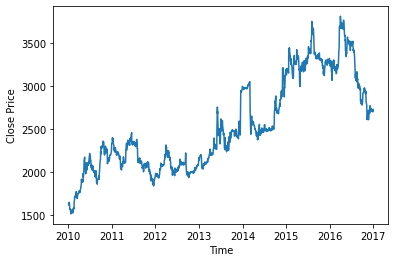

In [24]:
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

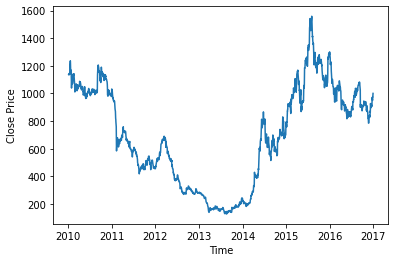

In [25]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');


In [26]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods=1)
beml_df['gain'] = beml_df.Close.pct_change(periods=1)

In [27]:
glaxo_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [28]:
# drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

In [32]:
glaxo_df[0:5]

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312


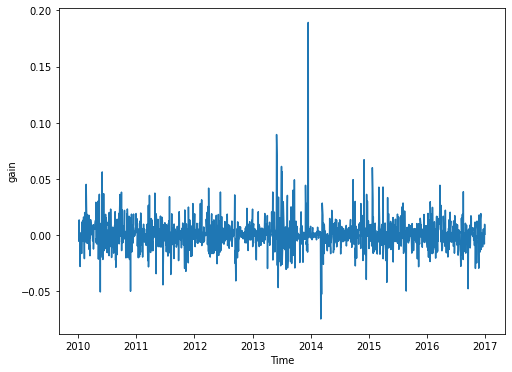

In [34]:
# Plot the gain
plt.figure(figsize=(8,6));
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

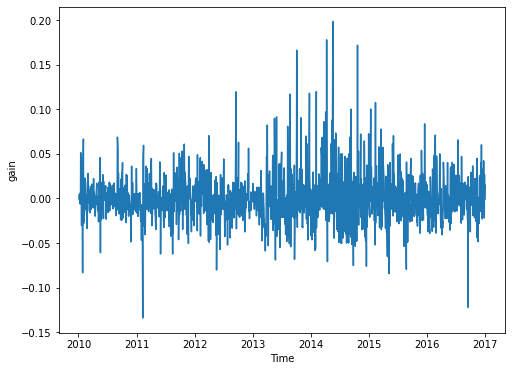

In [35]:
plt.figure(figsize=(8,6));
plt.plot(beml_df.index, beml_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


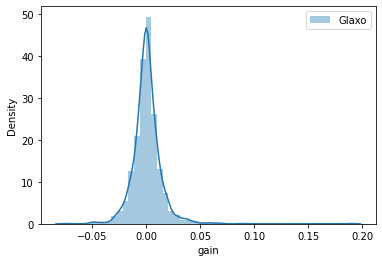

In [47]:
sns.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


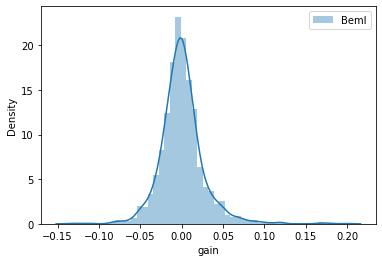

In [48]:
sns.distplot(beml_df.gain, label = 'Beml');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

In [56]:
print('Mean: ', round(glaxo_df.gain.mean(),4))
print('Standard Deviation: ', round(glaxo_df.gain.std(),4))

Mean:  0.0004
Standard Deviation:  0.0134


In [57]:
print('Mean: ', round(beml_df.gain.mean(),4))
print('Standard Deviation: ', round(beml_df.gain.std(),4))

Mean:  0.0003
Standard Deviation:  0.0264


In [58]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf(-0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.06352488667177397

In [60]:
#Probability of making 2% gain or higher in Glaxo
1-stats.norm.cdf(0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.07104511457618568

In [61]:
#Probability of making 2% loss or higher in Beml
stats.norm.cdf(-0.02, loc=beml_df.gain.mean(), scale= beml_df.gain.std())

0.22155987503755292

In [62]:
#probability of making 2% gain of higher in Beml
1-stats.norm.cdf(0.02, loc=beml_df.gain.mean(), scale=beml_df.gain.std())

0.22769829484075343